# Notebook acesso a API Bacen Data com Python.

*Referência:* https://analisemacro.com.br/economia/indicadores/coletando-dados-do-banco-central-com-python/

In [1]:
# Baixando a biblioteca de integração com a API Ipea Data.
!pip install python-bcb --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
# Instalando as bibliotecas necessárias.
from bcb import sgs
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Definindo Máximo do Linhas e Colunas
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [4]:
# Removendo Warnings.
import warnings
warnings.filterwarnings("ignore")

## Busca a série da SELIC no SGS

In [5]:
# Busca a série da SELIC no SGS
selic = sgs.get({'selic':432}, start = '1900-01-01')

In [6]:
# Visualiza a série
selic.head()

,selic
Date,
1999-03-05,45.0
1999-03-06,45.0
1999-03-07,45.0
1999-03-08,45.0
1999-03-09,45.0


In [8]:
# Verificando tamanho do data frame.
selic.shape

(8988, 1)

In [9]:
# Verificando qualidade das colunas.
selic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8988 entries, 1999-03-05 to 2023-10-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   selic   8988 non-null   float64
dtypes: float64(1)
memory usage: 140.4 KB


In [10]:
# Verificando valores nulos das colunas.
selic.isna().sum().sum()

0

In [11]:
# Medidas resumo.
selic.describe().T

,count,mean,std,min,25%,50%,75%,max
selic,8988.0,12.76196,5.671762,2.0,8.75,12.5,16.25,45.0


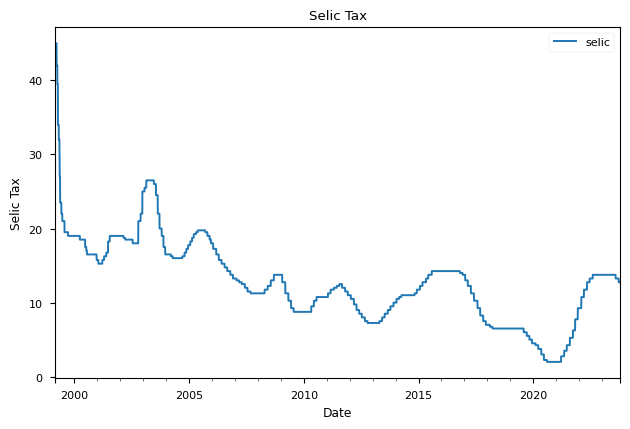

In [12]:
# Visualização gráfica das séries.
plt.style.use('seaborn-paper')
selic.plot()
plt.legend(loc='best')
plt.title("Selic Tax")
plt.xlabel('Date')
plt.ylabel('Selic Tax')
plt.tight_layout()
plt.show()